In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import json
import random
from BI_LSTM import LSTMTagger as LSTM

torch.manual_seed(1)

In [9]:
skeleton_json = open(r'/Users/Morten/Library/CloudStorage/OneDrive-SharedLibraries-ITU/Sofus Sebastian Schou Konglevoll - Bachelor/all_skeleton/skeleton_from_csv.json')
# skeleton_json = open((r'/Users/Morten/Library/CloudStorage/OneDrive-SharedLibraries-ITU/Sofus Sebastian Schou Konglevoll - Bachelor/all_skeleton/skeleton_good_padded_videos.json'))
full_skeleton = json.load(skeleton_json)

In [ ]:
for key in full_skeleton.keys():
    print(full_skeleton[key])
    break

In [11]:
test_labels = []
train_labels = []
for i in full_skeleton.keys():
    val = random.uniform(0, 1)
    if val > 0.7:
        test_labels.append(i)
    else:
        train_labels.append(i)

In [12]:
train = []

for label in train_labels:
    # print(full_skeleton[label][1])
    train.append(full_skeleton[label])


In [12]:
type(train)

list

In [11]:
counter = 0
for i, (x,y) in enumerate(train):
    if counter > 1:
        break
    else:
        print((x,y))
        counter += 1

([[-44, -64, -41, -69, -40, -69, -40, -69, -41, -69, -41, -69, -41, -69, -32, -68, -35, -69, -41, -61, -42, -61, -22, -50, -29, -54, -14, -22, -29, -29, -27, -4, -51, -15, -29, 1, -55, -11, -32, -1, -54, -8, -32, -2, -53, -9, 0, 0, -8, -4, 16, 24, -27, 7, 21, 39, -35, 34, 21, 41, -35, 43, 20, 45, -47, 43], [-31, -67, -29, -71, -28, -71, -28, -71, -29, -71, -29, -71, -28, -71, -23, -70, -23, -71, -28, -63, -29, -64, -16, -52, -15, -57, -15, -27, -9, -41, -21, -11, -16, -30, -21, -1, -18, -29, -23, -2, -19, -28, -23, -3, -19, -28, 0, -9, 1, -13, 14, 18, -12, 7, 37, 34, -20, 40, 41, 38, -8, 43, 36, 44, -28, 48], [-32, -67, -29, -71, -28, -71, -28, -71, -29, -71, -29, -71, -29, -71, -23, -70, -24, -71, -29, -64, -29, -64, -18, -52, -19, -57, -15, -26, -13, -42, -20, -5, -18, -27, -21, 3, -20, -25, -24, 1, -21, -24, -23, -1, -20, -25, 0, -9, -3, -13, 4, 19, -7, 9, 36, 33, 4, 36, 36, 38, 9, 37, 27, 46, -2, 45], [-33, -68, -30, -72, -29, -72, -28, -72, -31, -72, -31, -72, -31, -72, -23, -71, 

In [13]:
test_x = []
test_y = []

for label in test_labels:
    test_x.append(full_skeleton[label][0])
    test_y.append(full_skeleton[label][1])

[[[-36,
   -145,
   -33,
   -150,
   -32,
   -150,
   -30,
   -150,
   -33,
   -151,
   -32,
   -151,
   -31,
   -152,
   -21,
   -147,
   -24,
   -149,
   -34,
   -141,
   -34,
   -142,
   -10,
   -123,
   -14,
   -125,
   -19,
   -179,
   -20,
   -177,
   -14,
   -238,
   -14,
   -231,
   -14,
   -252,
   -13,
   -243,
   -11,
   -252,
   -11,
   -244,
   -12,
   -247,
   -12,
   -240,
   0,
   0,
   -3,
   -7,
   -9,
   80,
   -7,
   62,
   0,
   158,
   3,
   130,
   7,
   173,
   10,
   143,
   -38,
   174,
   -28,
   147],
  [-37,
   -146,
   -33,
   -150,
   -31,
   -150,
   -30,
   -150,
   -33,
   -151,
   -32,
   -151,
   -31,
   -152,
   -21,
   -148,
   -24,
   -149,
   -33,
   -142,
   -34,
   -142,
   -9,
   -123,
   -13,
   -125,
   -18,
   -181,
   -20,
   -177,
   -14,
   -238,
   -15,
   -231,
   -13,
   -252,
   -15,
   -242,
   -11,
   -252,
   -13,
   -244,
   -11,
   -247,
   -13,
   -240,
   0,
   -2,
   -2,
   -7,
   -8,
   80,
   -6,
   64,
   1,
   159,
   6,


In [14]:
tag_to_ix = {"idle": 0, "take-off": 1, "skill": 2, "landing": 3}

In [15]:
EMBEDDING_DIM = 66
HIDDEN_DIM = 4
HIDDEN_DIM2 = 4

In [16]:
from BI_LSTM import LSTMTagger as LSTM

model = LSTM(embedding_dim=EMBEDDING_DIM, hidden_dim=HIDDEN_DIM, tagset_size=len(tag_to_ix))

In [17]:
#model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, HIDDEN_DIM2, len(tag_to_ix))
from BI_LSTM import LSTMTagger as LSTM
model = LSTM(EMBEDDING_DIM, HIDDEN_DIM, len(tag_to_ix))
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.09508944332753301, momentum=0.7)

#{'num_layers': 2, 'lr': , 'momentum': 0.7}

# See what the scores are before training
# Note that element i,j of the output is the score for tag j for word i.
# Here we don't need to train, so the code is wrapped in torch.no_grad()

# train_data = prepare_data(training_data)
complete_loss = []
flatten_loss = []

for epoch in range(5):  # again, normally you would NOT do 300 epochs, it is toy data
    temp = []
    tot_loss = 0
    model.train()
    for sentence, tags in train:

        model.zero_grad()

        sentence_in = model.prepare_sequence_X(sentence)

        targets = model.prepare_sequence_Y(tags, tag_to_ix)
        tag_scores = model(sentence_in)

        loss = loss_function(tag_scores, targets)

        tot_loss += loss.item()
        loss.backward()
        optimizer.step()

    temp.append(loss.item())
    flatten_loss.append(tot_loss)
    complete_loss.append(temp)
    print(epoch, 'Loss', tot_loss)

all_tag_scores = []

with torch.no_grad():
    model.eval()
    for clip in test_x:
        temp_list = []

        inputs = model.prepare_sequence_X(clip)

        tag_scores = model(inputs)
        for frame in tag_scores:
            print(frame)
            frame_label = torch.argmax(frame)
            temp_list.append(int(frame_label))
        all_tag_scores.append(temp_list)

0 Loss 172.04281967878342
1 Loss 147.2499043047428
2 Loss 118.66597481071949
3 Loss 108.60412046313286
4 Loss 107.32735513150692
tensor([-0.5664, -0.8883, -4.3781, -4.7616])
tensor([-0.4757, -1.0220, -4.7140, -4.6357])
tensor([-0.4486, -1.0696, -4.8364, -4.5671])
tensor([-0.4378, -1.0899, -4.8914, -4.5273])
tensor([-0.4326, -1.1003, -4.9204, -4.5024])
tensor([-0.4296, -1.1062, -4.9370, -4.4861])
tensor([-0.4279, -1.1097, -4.9468, -4.4750])
tensor([-0.4270, -1.1118, -4.9524, -4.4673])
tensor([-0.4264, -1.1130, -4.9553, -4.4617])
tensor([-0.4262, -1.1135, -4.9564, -4.4576])
tensor([-0.4263, -1.1135, -4.9561, -4.4543])
tensor([-0.4265, -1.1132, -4.9546, -4.4516])
tensor([-0.4269, -1.1125, -4.9522, -4.4491])
tensor([-0.4275, -1.1115, -4.9487, -4.4465])
tensor([-0.4283, -1.1103, -4.9431, -4.4420])
tensor([-0.4019, -1.1661, -5.0322, -4.3570])
tensor([-0.3992, -1.1721, -5.0459, -4.3449])
tensor([-0.3970, -1.1771, -5.0561, -4.3357])
tensor([-0.3954, -1.1806, -5.0634, -4.3294])
tensor([-0.3943,

In [14]:
true_y_flatten = [item for sublist in test_y for item in sublist]
pred_y_flatten = [item for sublist in all_tag_scores for item in sublist]

true_y = [tag_to_ix[w] for w in true_y_flatten]

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(true_y, pred_y_flatten)

0.7612263858779807

In [289]:
from sklearn.metrics import confusion_matrix
import numpy as np
cm = confusion_matrix(true_y, pred_y_flatten)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[0.47192982, 0.15087719, 0.10350877, 0.27368421, 0.        ],
       [0.14114326, 0.31545519, 0.18772054, 0.35568102, 0.        ],
       [0.04324645, 0.02725118, 0.52665877, 0.4028436 , 0.        ],
       [0.03904456, 0.01423978, 0.14928801, 0.79742765, 0.        ],
       [0.3902439 , 0.34146341, 0.07317073, 0.19512195, 0.        ]])

In [83]:
# skeleton_json = open(r'/Users/Morten/Library/CloudStorage/OneDrive-SharedLibraries-ITU/Sofus Sebastian Schou Konglevoll - Bachelor/all_skeleton/skeleton_from_csv.json')

old_skeleton = open(r'/Users/Morten/Library/CloudStorage/OneDrive-SharedLibraries-ITU/Sofus Sebastian Schou Konglevoll - Bachelor/all_skeleton/skeleton_good_videos.json')

old_preprocess = json.load(old_skeleton)

In [87]:
old_preprocess.keys() == full_skeleton.keys()

False

In [1]:
import json

file = open(r'/Users/Morten/Library/CloudStorage/OneDrive-SharedLibraries-ITU/Sofus Sebastian Schou Konglevoll - Bachelor/kfold/fold0/sub_folder0/train.json')

data = json.load(file)

In [2]:
data.keys()

dict_keys(['Video13_24init', 'Video3_21init', 'Video17_video30init', 'Video3_38init', 'Video13_22init', 'Video17_video9init', 'Video2_13init', 'Video3_11init', 'Video5_video7init', 'Video2_6init', 'Video5_video15init', 'Video19_video8init', 'Video3_18init', 'Video3_8init', 'Video3_5init', 'Video3_29init', 'Video3_15init', 'Video2_12init', 'Video17_video16init', 'Video3_13init', 'Video3_7init', 'Video17_video44init', 'Video17_video15init', 'Video17_video57init', 'Video19_video6init', 'Video3_27init', 'Video2_18init', 'Video13_17init', 'Video19_video5init', 'Video3_31init', 'Video17_video52init', 'Video13_11init', 'Video3_44init', 'Video3_34init', 'Video13_20init', 'Video13_2init', 'Video3_20init', 'Video11_Video17init', 'Video3_25init', 'Video11_Video4init', 'Video2_4init', 'Video11_Video3init', 'Video17_video46init', 'Video19_video25init', 'Video17_video13init', 'Video17_video56init', 'Video1_Video1init', 'Video2_20init', 'Video13_6init', 'Video13_4init', 'Video11_Video15init', 'Video3

In [7]:
len(data['Video13_24init']['0'])

108

In [208]:
from code.models.kfoldLSTM.DataLoaderLSTM import LoadValTestJSON
from code.models.kfoldCNN.CNN import CNN
from code.models.BI_LSTM import LSTMTagger
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

PATH = r'/Users/Morten/Library/CloudStorage/OneDrive-SharedLibraries-ITU/Sofus Sebastian Schou Konglevoll - Bachelor/kfold/fold0/sub_folder0/LSTM_super-robin'

path_train = r"/Users/Morten/Library/CloudStorage/OneDrive-SharedLibraries-ITU/Sofus Sebastian Schou Konglevoll - Bachelor/kfold/fold0/sub_folder0/train.json"
path_validation = r"/Users/Morten/Library/CloudStorage/OneDrive-SharedLibraries-ITU/Sofus Sebastian Schou Konglevoll - Bachelor/kfold/fold0/tes.json"

dataloader = LoadValTestJSON()

validation_data, train_data = dataloader.LoadValAndTrain(val_path=path_validation, train_path=path_train)

In [88]:
model = torch.load(PATH)
# model.eval()

In [150]:
EMBEDDING_DIM = 66
HIDDEN_DIM = 4
HIDDEN_DIM2 = 4
tag_to_ix = {"idle": 0, "take-off": 1, "skill": 2, "landing": 3}

In [151]:
LT = LSTMTagger(embedding_dim=66, hidden_dim=4, tagset_size=len(tag_to_ix))

In [213]:
dataloader = LoadValTestJSON()


def check_accuracy(validation_data, model_path):

    model = torch.load(model_path)
    model.eval()
    # validation_data, train_data = dataloader.LoadValAndTrain(val_path=validation_path, train_path=path_train)

    pred_list = []
    y_list = []
    for i, (x, y) in enumerate(validation_data):

        inputs = LT.prepare_sequence_X(x)

        labels = LT.prepare_sequence_Y(y, tag_to_ix)

        tag_scores = model(inputs)

        for ix, frame in enumerate(tag_scores):
            frame_label = torch.argmax(frame)
            pred_list.append(int(frame_label))
            y_list.append(labels[ix])

    f1 = f1_score(y_list, pred_list, average='macro')
    acc = accuracy_score(y_list, pred_list)
    confs_matrix = confusion_matrix(y_list, pred_list)
    cm = confs_matrix.astype('float') / confs_matrix.sum(axis=1)[:, np.newaxis]

    return acc, f1, cm

In [98]:
def MakeAndSavePreds(path_to_kfold):

    folders = ["fold0", "fold1", "fold2", "fold3", "fold4"]
    subfolders = ["sub_folder0", "sub_folder1", "sub_folder2", "sub_folder3"]

    model_stats = {}

    for folder in folders:

        path_to_folder = path_to_kfold + "/" + folder

        path_to_test = path_to_folder + '/tes.json'

        dataloader = LoadValTestJSON()

        test, _ = dataloader.LoadValAndTrain(val_path=path_to_test, train_path=path_to_test)

        for sub_folder in subfolders:

            sub_model_stats = {}

            path_to_subfolder = path_to_folder + "/" + sub_folder

            model_path = path_to_subfolder + '/LSTM_super-robin_v2'
            # print(model_path)

            acc, f1 = check_accuracy(test, model_path)

            sub_model_stats['Acc'] = acc*100
            sub_model_stats['F1'] = f1*100

            model_name = folder + '_' + sub_folder

            model_stats[model_name] = sub_model_stats

    return model_stats



In [ ]:
ModelStats = MakeAndSavePreds(r'/Users/Morten/Library/CloudStorage/OneDrive-SharedLibraries-ITU/Sofus Sebastian Schou Konglevoll - Bachelor/kfold')

In [ ]:
for key in ModelStats.keys():
    print('Scores for ', key)
    print('Accuracy: ', ModelStats[key]['Acc'])
    print('F1-Score: ', ModelStats[key]['F1'])
    print('-----------------------------------')

In [214]:
def scores(test_data, model_path):

    model = torch.load(model_path)
    model.eval()
    # validation_data, train_data = dataloader.LoadValAndTrain(val_path=validation_path, train_path=path_train)

    scores = []
    for i, (x, y) in enumerate(test_data):

        inputs = LT.prepare_sequence_X(x)

        labels = LT.prepare_sequence_Y(y, tag_to_ix)

        tag_scores = model(inputs)
        # print(type(tag_scores))
        scores += tag_scores.tolist()
        # scores.append(tag_scores)

    # scores = np.array(scores.tolist())
    # print(scores)


    return scores

In [215]:
def EnsemblePrediction(scores):

    start = np.zeros(scores[0].shape)


    for array in scores:
        start += array

    preds = np.argmax(start, axis=1)

    return preds.tolist()



In [216]:
def predict_ensemble(test_data, preds):
    y_list = []

    for i, (x,y) in enumerate(test_data):

        labels = LT.prepare_sequence_Y(y, tag_to_ix)
        y_list += labels

    # f1 = f1_score(y_list, preds, average='macro')
    # acc = accuracy_score(y_list, preds)

    confs_matrix = confusion_matrix(y_list, preds)
    cm = confs_matrix.astype('float') / confs_matrix.sum(axis=1)[:, np.newaxis]

    return cm

In [217]:
def MakeAvgCFMatrix(path_to_kfold, plot_name):

    folders = ["fold0", "fold1", "fold2", "fold3", "fold4"]
    subfolders = ["sub_folder0", "sub_folder1", "sub_folder2", "sub_folder3"]

    model_stats = {}

    avg_confs_matrix = np.zeros((4,4))

    for folder in folders:

        path_to_folder = path_to_kfold + "/" + folder

        path_to_test = path_to_folder + '/tes.json'

        dataloader = LoadValTestJSON()

        test, _ = dataloader.LoadValAndTrain(val_path=path_to_test, train_path=path_to_test)

        model_path = path_to_folder + '/LSTM_batman_model'

        acc, f1, confs_matrix =check_accuracy(test, model_path)
        avg_confs_matrix += confs_matrix


        ensemble_scores = []

        # for sub_folder in subfolders:
        #
        #     sub_model_stats = {}
        #
        #     path_to_subfolder = path_to_folder + "/" + sub_folder
        #
        #     model_path = path_to_subfolder + '/LSTM_super-robin'
        #     # print(model_path)
        #
        #     score = scores(test, model_path)
        #     softmax = np.asarray(score).reshape((len(score), 4))
        #     # confs_mat = predict_ensemble(test, softmax)
        #     ensemble_scores.append(softmax)
        #
        #
        #
        #
        # ensemble_predictions = EnsemblePrediction(ensemble_scores)
        # confs_matrix = predict_ensemble(test, ensemble_predictions)
        # avg_confs_matrix += confs_matrix
        # # print('--------------------------')
        # # print(avg_confs_matrix)
        # # print('--------------------------')


    print(avg_confs_matrix/5)


    figure_name = path_to_kfold + '/' +  plot_name
    cf_matrix = avg_confs_matrix/5
    categories = ['Idle', 'Take-off', 'Skill', 'Landing']
    sns.heatmap(cf_matrix, annot=True, xticklabels=categories, yticklabels = categories, cmap= 'Blues', robust=True)
    plt.savefig(figure_name)

    # return (avg_confs_matrix/5)

----------------------------------
FINAAAAAAAAAAAAAAAAAAAAAAAAL
[[0.56334757 0.21699449 0.05626368 0.16339426]
 [0.0735438  0.85922452 0.0596716  0.00756007]
 [0.00794434 0.07236244 0.84221363 0.0774796 ]
 [0.04428381 0.00457604 0.05219437 0.89894578]]
----------------------------------


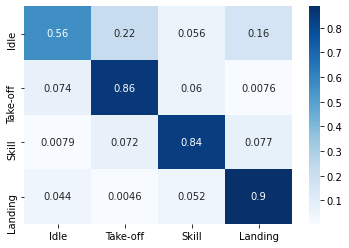

In [218]:
MakeAvgCFMatrix(r'/Users/Morten/Library/CloudStorage/OneDrive-SharedLibraries-ITU/Sofus Sebastian Schou Konglevoll - Bachelor/kfold', 'LSTM-batman')

In [265]:
import pandas as pd

test = r'/Users/Morten/Library/CloudStorage/OneDrive-SharedLibraries-ITU/Sofus Sebastian Schou Konglevoll - Bachelor/kfold/fold0/test_non_padded.csv'

train = r'/Users/Morten/Library/CloudStorage/OneDrive-SharedLibraries-ITU/Sofus Sebastian Schou Konglevoll - Bachelor/kfold/fold0/train_non_padded.csv'

In [266]:
train_df = pd.read_csv(train)
test_df = pd.read_csv(test)

In [269]:
train_df.shape[0] + test_df.shape[0]

17734

In [268]:
test_df.shape

(4140, 69)